#**<font color='yellow'>Model Name: Ensemble Model(Name1,Name2)</font>**
##**Date: 21<sup>st</sup>January 2020**

### **Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####**Import Necessary Library**

In [ ]:
import numpy as np
import cv2
import os
import pandas as pd

import glob as gb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D ,LeakyReLU

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Average

####**Define directories path**

In [ ]:
## Define the directories for training, testing, and validation
train_directory = '/content/drive/MyDrive/ISIC2018/train'
test_directory = '/content/drive/MyDrive/ISIC2018/test'
valid_directory = '/content/drive/MyDrive/ISIC2018/validation'

In [ ]:
import os
import glob

# Specify the directory containing the .gdf5 files
directory = '/content/drive/MyDrive/ISIC2018/0.001/Nadam/Inceptionv3'  # Change this to your directory path

# Use glob to find all .gdf5 files in the directory
gdf5_files = glob.glob(os.path.join(directory, '*.hdf5'))

# Initialize variables to track the latest file
latest_file = None
latest_time = 0

# Iterate through the files to find the latest one
for file in gdf5_files:
    # Get the last modified time
    modified_time = os.path.getmtime(file)

    # Update latest_file if this file is newer
    if modified_time > latest_time:
        latest_time = modified_time
        latest_file = file

# Output the result
if latest_file:
    print(f"The latest .gdf5 file is: {latest_file}")
else:
    print("No .gdf5 files found.")


The latest .gdf5 file is: /content/drive/MyDrive/ISIC2018/0.001/Nadam/Inceptionv3/inceptionv3-28-0.8300.hdf5


####**Ensemble Model directory path**

In [ ]:
## Define the directories for of wieghted path as .hdf5
model_1 = load_model('/content/drive/MyDrive/ISIC2018/0.001/Nadam/EfficientNetB3/efficientnet-18-0.7700.hdf5')
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')

In [ ]:
model_2 = load_model('/content/drive/MyDrive/ISIC2018/0.001/Nadam/ResNet-50/ResNet-50/Nadam-01-0.7000.hdf5')
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2')

In [ ]:
model_3 = load_model('/content/drive/MyDrive/ISIC2018/0.001/Nadam/Inceptionv3/inceptionv3-28-0.8300.hdf5')
model_3 = Model(inputs=model_3.inputs,
                outputs=model_3.outputs,
                name='name_of_model_3')

####**Create dataset function using keras/Tensorflow**

In [ ]:
IMG_SIZE = (299, 299)  # define resolution (299,299) /(224,224)
BATCH_SIZE = 128       # varies from dataset to datset prefferable 128/68/32

In [ ]:
# Create TensorFlow datasets for training, testing, and validation
#you can customize parameters as per dataset
train_dataset = image_dataset_from_directory(
    train_directory,
    shuffle=True,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    color_mode='rgb',
    seed=42
)

test_dataset = image_dataset_from_directory(
    test_directory,
    shuffle=True,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    color_mode='rgb',
    seed=42
)

valid_dataset = image_dataset_from_directory(
    valid_directory,
    shuffle=True,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    color_mode='rgb',
    seed=42
)

Found 5200 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [ ]:
# Optional: You can also specify the class names if you have a specific order for your classes
class_names = train_dataset.class_names

# Print class names
print("Class Names:", class_names)

Class Names: ['benign', 'malignant']


<ipython-input-13-6d7f5d53cb9c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=folder_names, y=data_sizes, palette="rocket")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


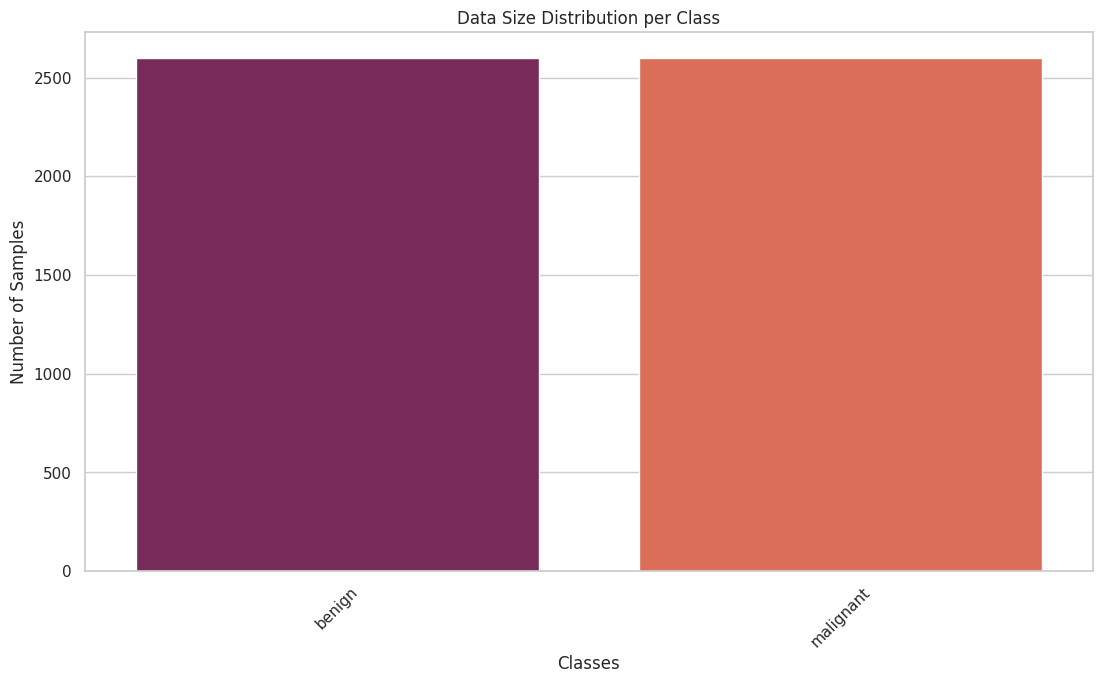

In [ ]:
# Initialize lists to hold folder names and their corresponding file counts
folder_names = []
data_sizes = []

# Loop through each folder in the training directory
for folder in os.listdir(train_directory):
    folder_path = os.path.join(train_directory, folder)  # Get full path to the folder
    if os.path.isdir(folder_path):  # Check if it's a directory
        files = gb.glob(os.path.join(folder_path, "*.*"))  # Get all files in the folder
        folder_names.append(folder)  # Append folder name
        data_sizes.append(len(files))  # Append count of files

# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(13, 7))
sns.barplot(x=folder_names, y=data_sizes, palette="rocket")

# Add labels and title
plt.xlabel("Classes")  # X-axis label
plt.ylabel("Number of Samples")  # Y-axis label
plt.title("Data Size Distribution per Class")  # Title

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.show()


<ipython-input-13-692dc6d515a1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[ "0","1"], y=Dataset, palette="rocket")  ## change the class name
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


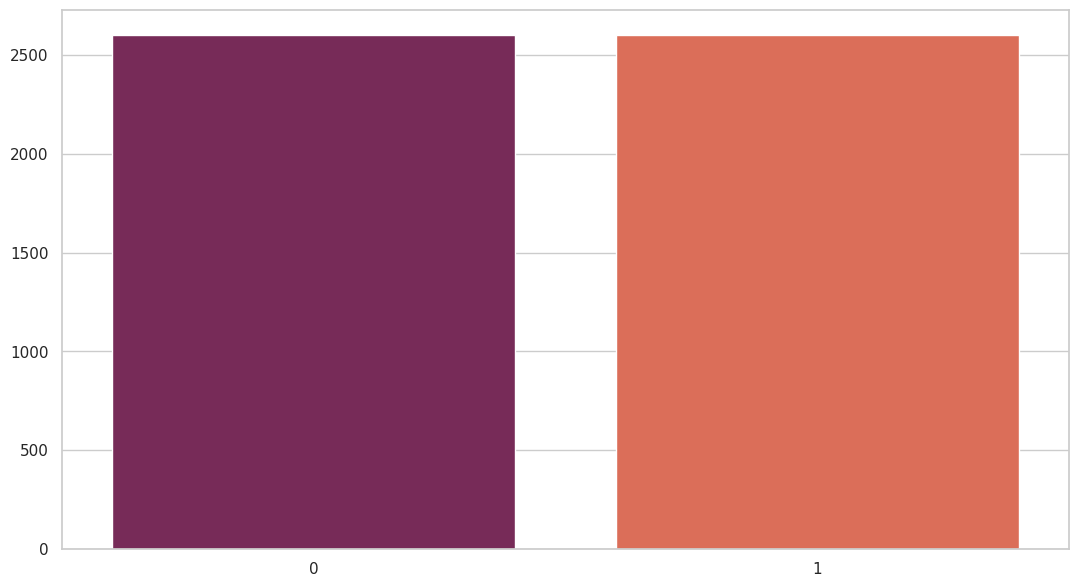

In [ ]:
#plot bar chart for demonstrating data size
sns.set_theme(style="whitegrid")
Dataset = []
for folder in os.listdir(train_directory):
    files = gb.glob(pathname=str(train_directory + "/" + folder +"/*.*"))
    Dataset.append(len(files))
plt.figure(figsize=(13,7))                    ## change the len size
sns.barplot(x=[ "0","1"], y=Dataset, palette="rocket")  ## change the class name
plt.show()

## <font color='blue'>Build the Model</font>

In [ ]:
base_learning_rate = 0.001 # prefferable lr is 0.0001 or 0.001
IMG_SHAPE = IMG_SIZE +(3,)

In [ ]:
models = [model_1, model_2, model_3]
model_input = Input(shape=(299, 299, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [ ]:
## customize optimizer as Nadam or Adam
ensemble_model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=base_learning_rate),
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
## set the path name as *dataset/Lr/optimizer_name/model_name*
model_filepath="/content/drive/MyDrive/ISIC2018/0.001/ensemble-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath = model_filepath ,
    monitor ='val_accuracy',
    mode = 'max' ,
    save_best_only =True ,
    verbose = 1
)

In [ ]:
#avoid random weight initialization do automatic if you can

total = 0
for i in range(0,len(Dataset )) :
    total +=Dataset [i]

weight_for_0 = (1 / Dataset [0]) * (total / 2.0)
weight_for_1 = (1 / Dataset [1]) * (total / 2.0)


class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
## change hyperparameter such as epoches ## EnsembleNet3: Resnet, efficientnet, inceptionv3
history = ensemble_model.fit(train_dataset , verbose=2 , epochs=13 , class_weight=class_weight ,
                               validation_data=valid_dataset , use_multiprocessing= True)

Epoch 1/13
41/41 - 414s - loss: 0.2859 - accuracy: 0.9248 - val_loss: 0.5154 - val_accuracy: 0.7900 - 414s/epoch - 10s/step
Epoch 2/13
41/41 - 327s - loss: 0.2521 - accuracy: 0.9279 - val_loss: 0.5179 - val_accuracy: 0.8200 - 327s/epoch - 8s/step
Epoch 3/13
41/41 - 325s - loss: 0.2461 - accuracy: 0.9212 - val_loss: 0.5806 - val_accuracy: 0.7700 - 325s/epoch - 8s/step
Epoch 4/13
41/41 - 324s - loss: 0.2447 - accuracy: 0.9198 - val_loss: 0.5182 - val_accuracy: 0.7800 - 324s/epoch - 8s/step
Epoch 5/13
41/41 - 326s - loss: 0.2413 - accuracy: 0.9262 - val_loss: 0.5291 - val_accuracy: 0.8200 - 326s/epoch - 8s/step
Epoch 6/13
41/41 - 327s - loss: 0.2301 - accuracy: 0.9263 - val_loss: 0.5674 - val_accuracy: 0.7600 - 327s/epoch - 8s/step
Epoch 7/13
41/41 - 324s - loss: 0.2253 - accuracy: 0.9275 - val_loss: 0.5254 - val_accuracy: 0.8300 - 324s/epoch - 8s/step
Epoch 8/13
41/41 - 327s - loss: 0.2195 - accuracy: 0.9296 - val_loss: 0.5784 - val_accuracy: 0.7900 - 327s/epoch - 8s/step
Epoch 9/13
41/4

In [ ]:
ensemble_model.evaluate(test_dataset , verbose = 1)

8/8 [==============================] - 67s 8s/step - loss: 0.4952 - accuracy: 0.7850


[0.4951937794685364, 0.7850000262260437]

1/1 [==============================] - 0s 120ms/step


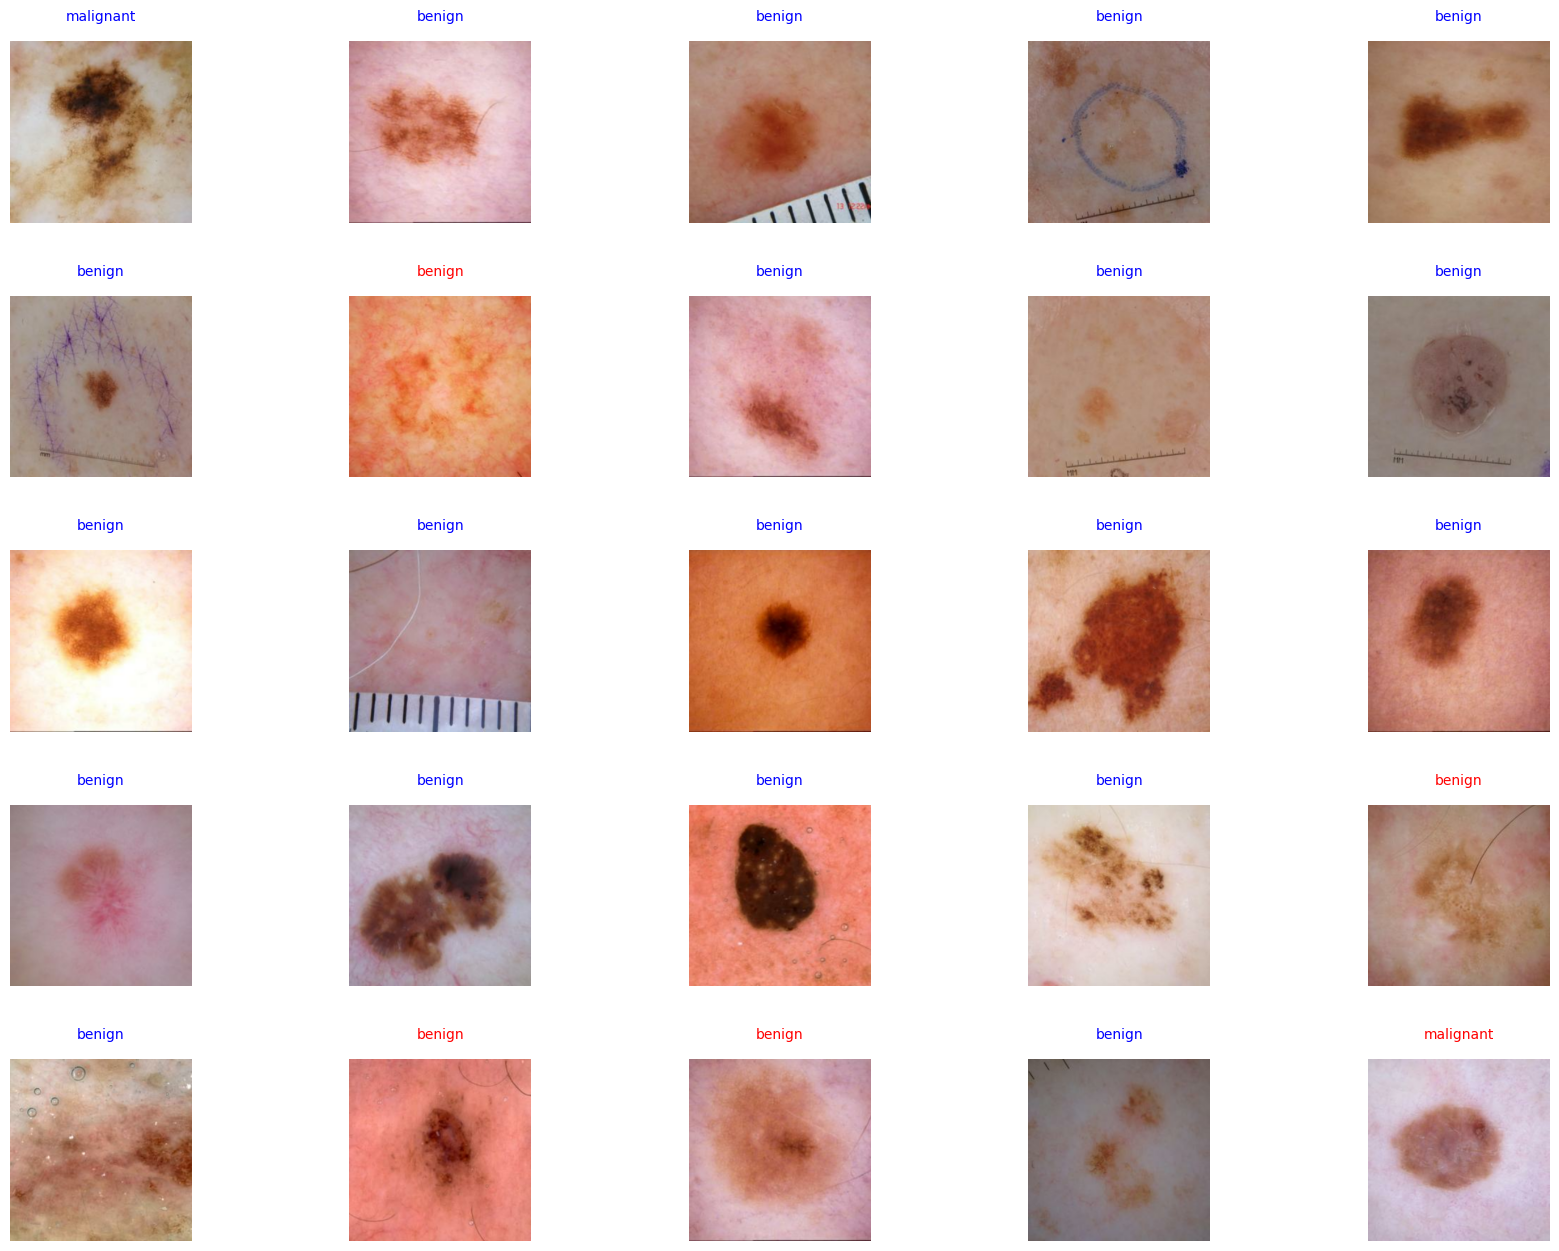

In [ ]:
plt.figure(figsize=(20, 15))
for images, labels in test_dataset.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        im2 = images[i].numpy().astype("uint8")
        img2 = tf.expand_dims(im2, 0)
        predict = ensemble_model.predict(img2)
        predicted= class_names[np.argmax(predict)]
        actual = class_names [labels[i].numpy().astype("uint8")]
        if (actual == predicted):
            plt.title(predicted, fontsize=10, color= 'blue', pad=15);
        else :
            plt.title(actual, fontsize=10, color= 'red' ,pad=15);
        plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,
                            top=0.9, wspace=0.4,hspace=0.4)

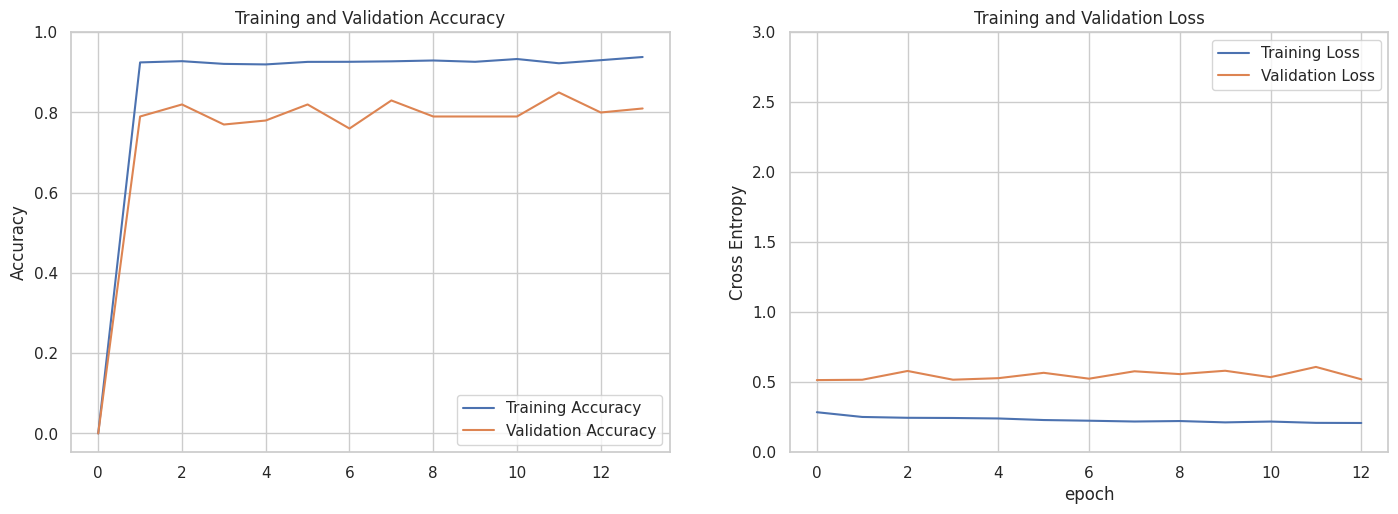

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and make predictions
for images, labels in test_dataset:
    predictions = ensemble_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Binarize the true and predicted labels
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))
predicted_labels_bin = label_binarize(predicted_labels, classes=np.unique(predicted_labels))

4/4 [==============================] - 10s 1s/step


In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the classification report
print(report)

              precision    recall  f1-score   support

      benign       0.87      0.86      0.86       796
   malignant       0.47      0.50      0.48       204

    accuracy                           0.79      1000
   macro avg       0.67      0.68      0.67      1000
weighted avg       0.79      0.79      0.79      1000



4/4 [==============================] - 6s 1s/step


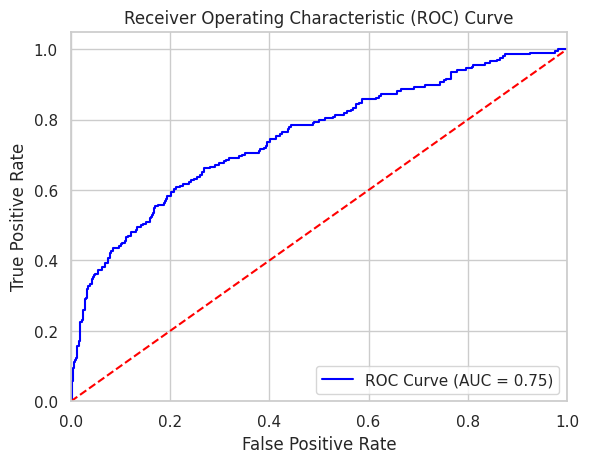

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'model' is your trained model and 'test_dataset' is your test data
predicted_probs = []
true_labels = []
for images, labels in test_dataset:
    predictions = ensemble_model.predict(images)
    predicted_probs.extend(predictions) # Assuming your model outputs probabilities
    true_labels.extend(labels.numpy())

# Ensure predicted_probs are probabilities for the positive class
if len(predicted_probs[0]) > 1:
    predicted_probs = np.array(predicted_probs)[:, 1] # Assuming binary classification

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)

# Calculate AUC
auc = roc_auc_score(true_labels, predicted_probs)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

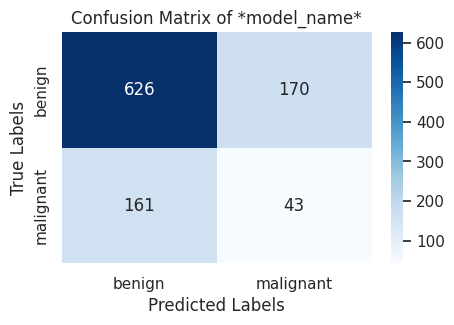

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
## change the model name
plt.title('Confusion Matrix of *model_name*')
plt.show()

In [ ]:
# Calculate total right and wrong predictions
total_right = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
total_wrong = sum(1 for true, pred in zip(true_labels, predicted_labels) if true != pred)
total_samples = len(true_labels)

# Calculate wrong prediction percentage
wrong_prediction_percentage = (total_wrong / total_samples) * 100

print("Total Right Predictions:", total_right)
print("Total Wrong Predictions:", total_wrong)
print("Wrong Prediction Percentage: {:.2f}%".format(wrong_prediction_percentage))


Total Right Predictions: 669
Total Wrong Predictions: 331
Wrong Prediction Percentage: 33.10%


In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
TN, FP, FN, TP = cm.ravel()

# Right and wrong classifications
right_classifications = TP + TN
wrong_classifications = FP + FN

# Calculate percentages
total = right_classifications + wrong_classifications
right_percentage = (right_classifications / total) * 100
wrong_percentage = (wrong_classifications / total) * 100

# Data for the bar plot
labels = ['Right', 'Wrong']
percentages = [right_percentage, wrong_percentage]


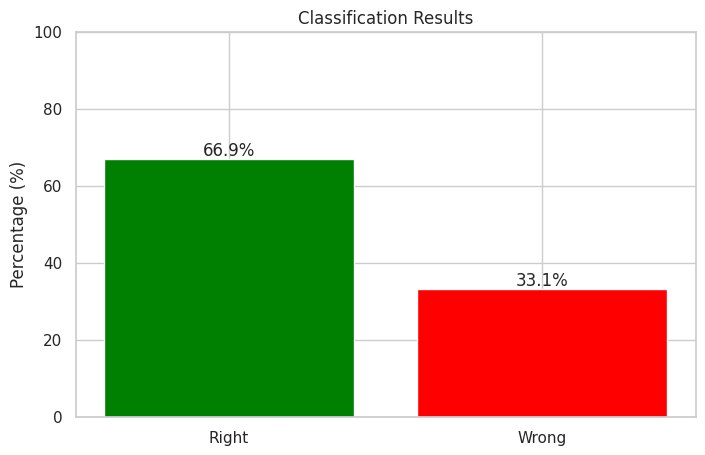

In [ ]:
# Create the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, percentages, color=['green', 'red'])

# Add percentage labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%',
             ha='center', va='bottom')  # va: vertical alignment

# Add titles and labels
plt.title('Classification Results')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')  # Optional: Add a horizontal line at y=0

# Show the plot
plt.show()

4/4 [==============================] - 6s 1s/step


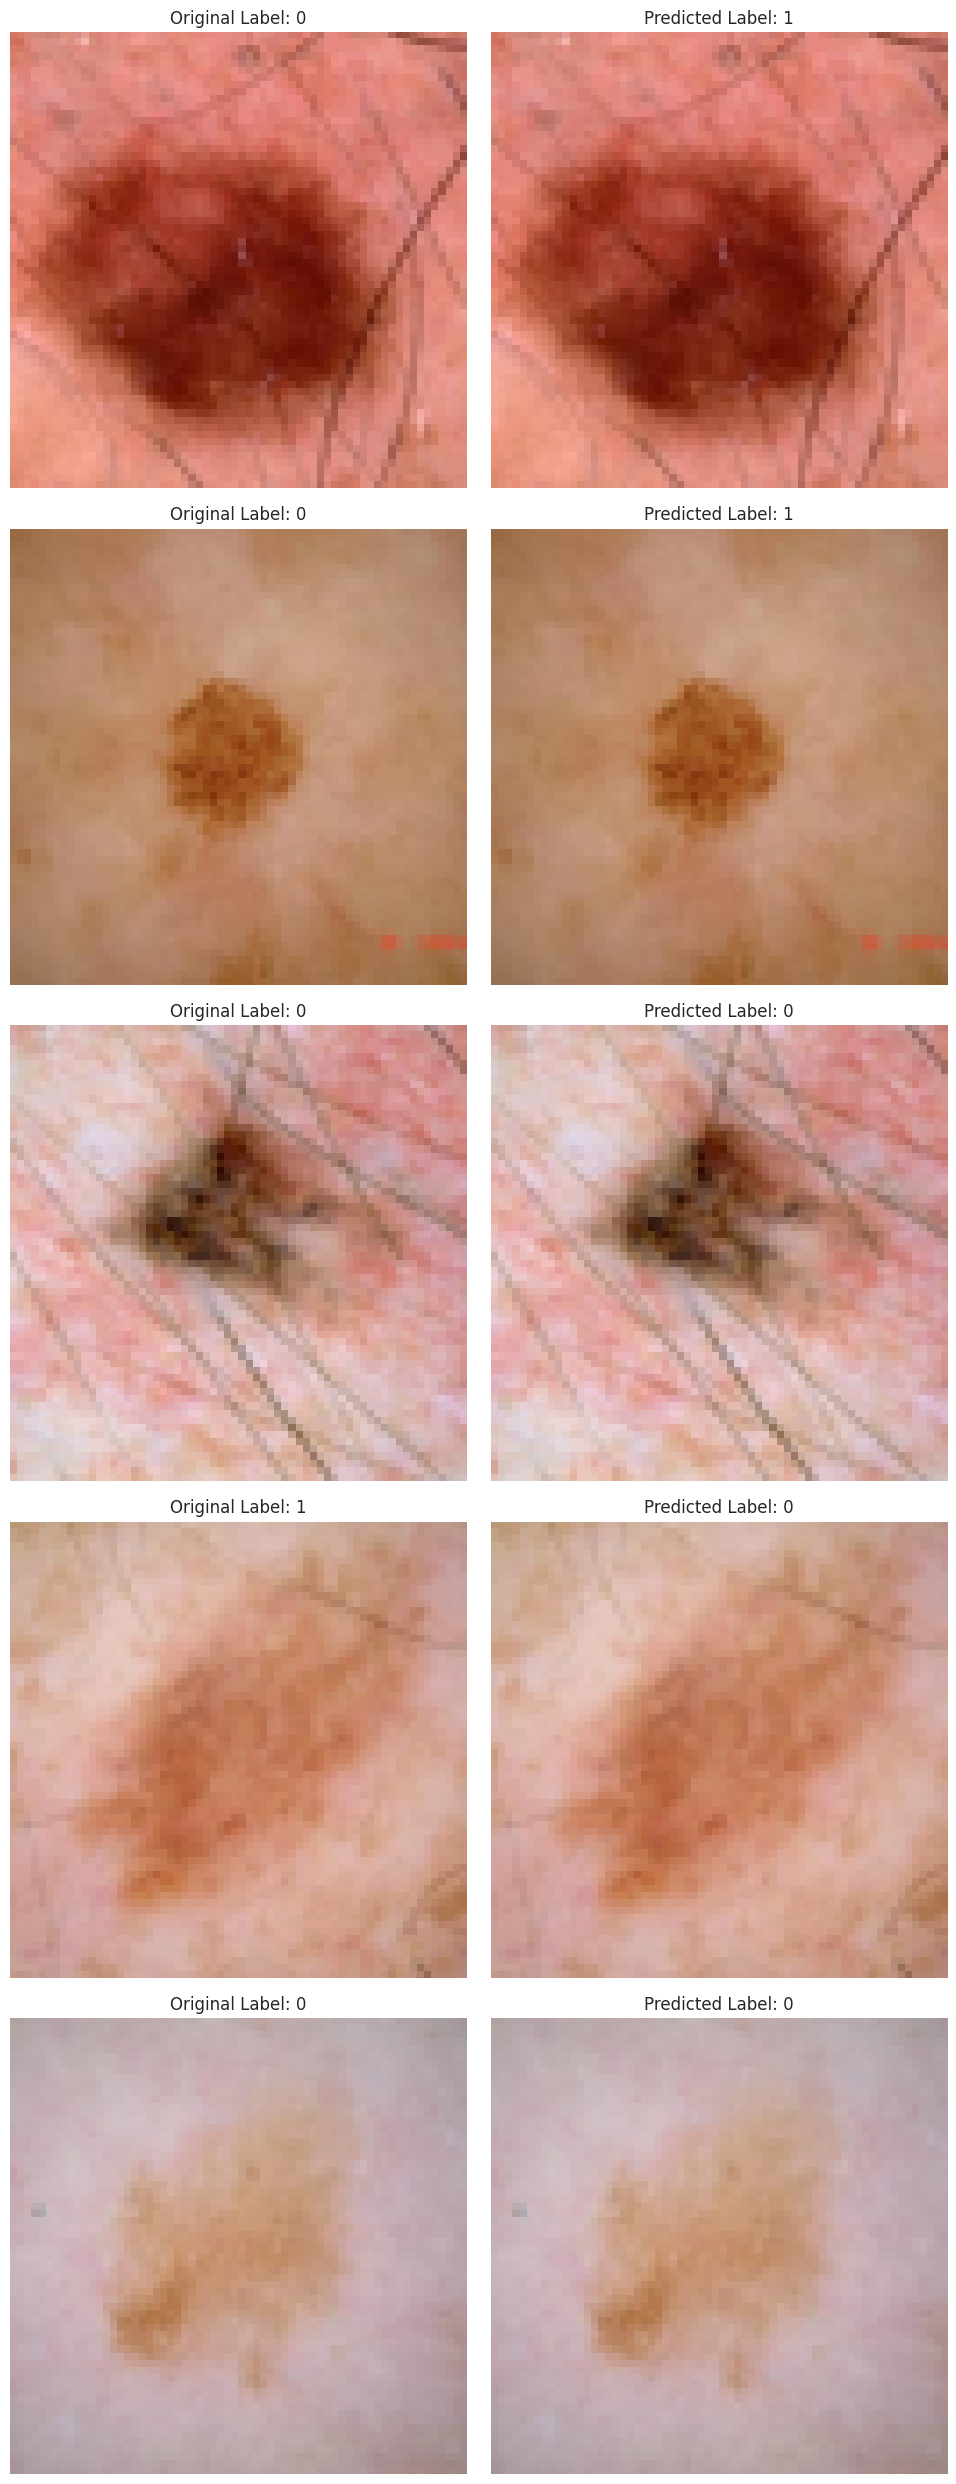

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

# Function to load a specified number of random images from subfolders
def load_random_images_from_subfolders(folder, num_images=5):
    images = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            image_files = os.listdir(subfolder_path)
            # Randomly select images from this subfolder
            selected_files = random.sample(image_files, min(num_images, len(image_files)))
            for image_file in selected_files:
                img_path = os.path.join(subfolder_path, image_file)
                img = Image.open(img_path)
                img = img.resize((64, 64))  # Resize to a consistent size if necessary
                images.append(np.array(img) / 255.0)  # Normalize pixel values
                if len(images) >= num_images:  # Stop if we have enough images
                    break
        if len(images) >= num_images:  # Stop checking subfolders if we have enough images
            break
    return np.array(images)

# Set the path to your test folder
test_folder = '/content/drive/MyDrive/ISIC2018/test'  # Folder containing subfolders of images

# Load exactly 5 random images from subfolders
images = load_random_images_from_subfolders(test_folder, num_images=5)

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and make predictions
for images_batch, labels in test_dataset:  # Replace test_dataset with your actual dataset variable
    predictions = ensemble_model.predict(images_batch)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Convert the lists to NumPy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Ensure that we are only working with the number of images we loaded
num_loaded_images = len(images)
if len(true_labels) > num_loaded_images:
    true_labels = true_labels[:num_loaded_images]
if len(predicted_labels) > num_loaded_images:
    predicted_labels = predicted_labels[:num_loaded_images]

# Set up the plot
cols = 2  # Two columns: original and predicted
rows = num_loaded_images  # One row for each loaded image

fig, axes = plt.subplots(rows, cols, figsize=(10, 5 * rows))

# Loop through and display images
for i in range(num_loaded_images):
    original_image = images[i]
    predicted_label = predicted_labels[i]
    true_label = true_labels[i]

    # Plot original image
    axes[i, 0].imshow(original_image)
    axes[i, 0].set_title(f'Original Label: {true_label}')
    axes[i, 0].axis('off')

    # Plot predicted image (optionally the same image)
    axes[i, 1].imshow(original_image)
    axes[i, 1].set_title(f'Predicted Label: {predicted_label}')
    axes[i, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
## change hyperparameter such as epoches ## EnsembleNet3: Resnet, efficientnet, densenet
history = ensemble_model.fit(train_dataset , verbose=2 , epochs=13 , class_weight=class_weight ,
                               validation_data=valid_dataset , use_multiprocessing= True)

Epoch 1/13
41/41 - 516s - loss: 0.3338 - accuracy: 0.8837 - val_loss: 0.5746 - val_accuracy: 0.7800 - 516s/epoch - 13s/step
Epoch 2/13


####**Training model**

In [ ]:
## change hyperparameter such as epoches ### Ensemble3: densenet, efficientnet, inceptionv3
history = ensemble_model.fit(train_dataset , verbose=2 , epochs=13 , class_weight=class_weight ,
                               validation_data=valid_dataset , use_multiprocessing= True )

Epoch 1/13
41/41 - 389s - loss: 0.1330 - accuracy: 0.9833 - val_loss: 0.6012 - val_accuracy: 0.7900 - 389s/epoch - 9s/step
Epoch 2/13
41/41 - 380s - loss: 0.1311 - accuracy: 0.9796 - val_loss: 0.6282 - val_accuracy: 0.7800 - 380s/epoch - 9s/step
Epoch 3/13
41/41 - 383s - loss: 0.1385 - accuracy: 0.9765 - val_loss: 0.5506 - val_accuracy: 0.8400 - 383s/epoch - 9s/step
Epoch 4/13
41/41 - 385s - loss: 0.1401 - accuracy: 0.9700 - val_loss: 0.6457 - val_accuracy: 0.7600 - 385s/epoch - 9s/step
Epoch 5/13
41/41 - 385s - loss: 0.1305 - accuracy: 0.9767 - val_loss: 0.6210 - val_accuracy: 0.7700 - 385s/epoch - 9s/step
Epoch 6/13
41/41 - 383s - loss: 0.1312 - accuracy: 0.9760 - val_loss: 0.5592 - val_accuracy: 0.8000 - 383s/epoch - 9s/step
Epoch 7/13
41/41 - 382s - loss: 0.1194 - accuracy: 0.9829 - val_loss: 0.6270 - val_accuracy: 0.7900 - 382s/epoch - 9s/step
Epoch 8/13
41/41 - 383s - loss: 0.1307 - accuracy: 0.9777 - val_loss: 0.6586 - val_accuracy: 0.7900 - 383s/epoch - 9s/step
Epoch 9/13
41/41

In [ ]:
## change hyperparameter such as epoches
history = ensemble_model.fit(train_dataset , verbose=2 , epochs=15 , class_weight=class_weight ,
                               validation_data=valid_dataset , use_multiprocessing= True)

Epoch 1/15
41/41 - 407s - loss: 0.1478 - accuracy: 0.9685 - val_loss: 0.6101 - val_accuracy: 0.7800 - 407s/epoch - 10s/step
Epoch 2/15
41/41 - 401s - loss: 0.1339 - accuracy: 0.9773 - val_loss: 0.6355 - val_accuracy: 0.7900 - 401s/epoch - 10s/step
Epoch 3/15
41/41 - 402s - loss: 0.1464 - accuracy: 0.9671 - val_loss: 0.5632 - val_accuracy: 0.8300 - 402s/epoch - 10s/step
Epoch 4/15
41/41 - 405s - loss: 0.1538 - accuracy: 0.9631 - val_loss: 0.5871 - val_accuracy: 0.8000 - 405s/epoch - 10s/step
Epoch 5/15
41/41 - 403s - loss: 0.1344 - accuracy: 0.9760 - val_loss: 0.5855 - val_accuracy: 0.8000 - 403s/epoch - 10s/step
Epoch 6/15
41/41 - 398s - loss: 0.1241 - accuracy: 0.9819 - val_loss: 0.6347 - val_accuracy: 0.7900 - 398s/epoch - 10s/step
Epoch 7/15
41/41 - 406s - loss: 0.1197 - accuracy: 0.9831 - val_loss: 0.5933 - val_accuracy: 0.7800 - 406s/epoch - 10s/step
Epoch 8/15
41/41 - 397s - loss: 0.1225 - accuracy: 0.9808 - val_loss: 0.6190 - val_accuracy: 0.8100 - 397s/epoch - 10s/step
Epoch 9/

In [ ]:
ensemble_model.evaluate(test_dataset , verbose = 1)

8/8 [==============================] - 72s 8s/step - loss: 0.5508 - accuracy: 0.7990


[0.550757884979248, 0.7990000247955322]

###**Model evaluating on Test dataset**

1/1 [==============================] - 0s 122ms/step


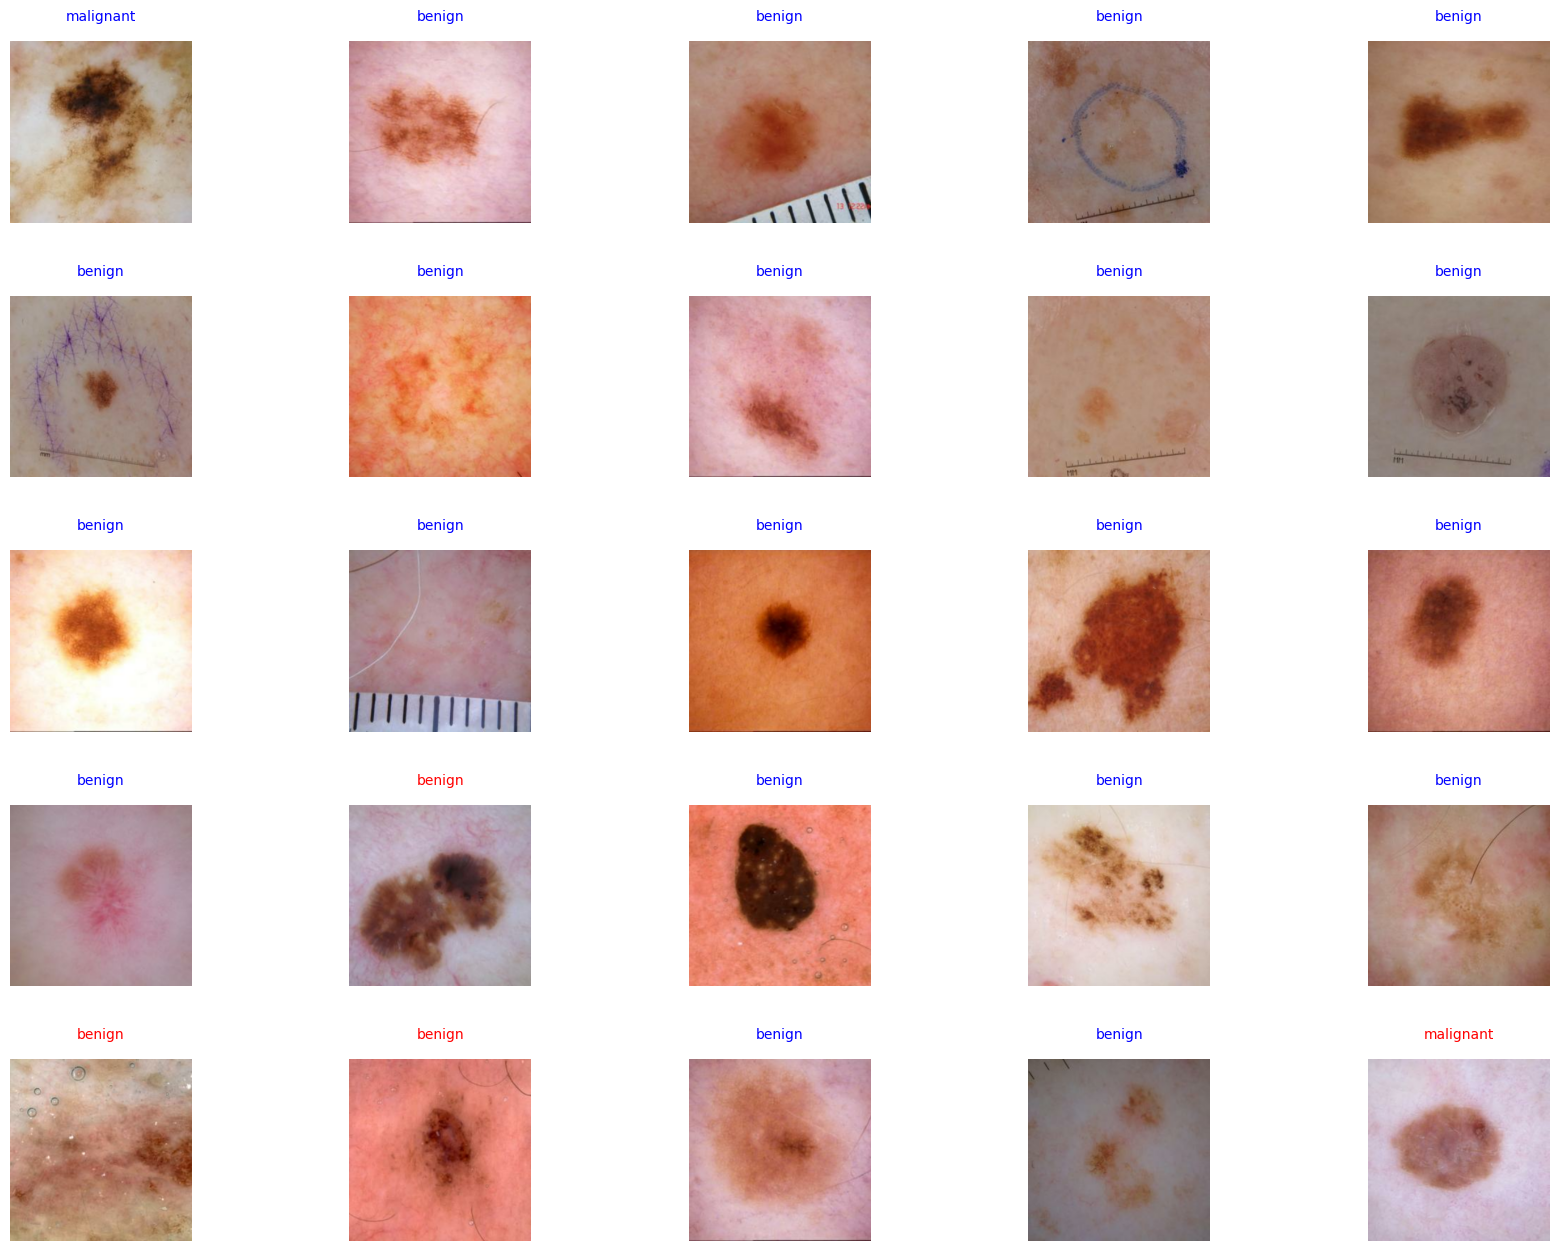

In [ ]:
plt.figure(figsize=(20, 15))
for images, labels in test_dataset.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        im2 = images[i].numpy().astype("uint8")
        img2 = tf.expand_dims(im2, 0)
        predict = ensemble_model.predict(img2)
        predicted= class_names[np.argmax(predict)]
        actual = class_names [labels[i].numpy().astype("uint8")]
        if (actual == predicted):
            plt.title(predicted, fontsize=10, color= 'blue', pad=15);
        else :
            plt.title(actual, fontsize=10, color= 'red' ,pad=15);
        plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,
                            top=0.9, wspace=0.4,hspace=0.4)

###**<font color='green'>Training and Validation Accuracy </font> & <font color='red'>Training and Validation Loss </font>**

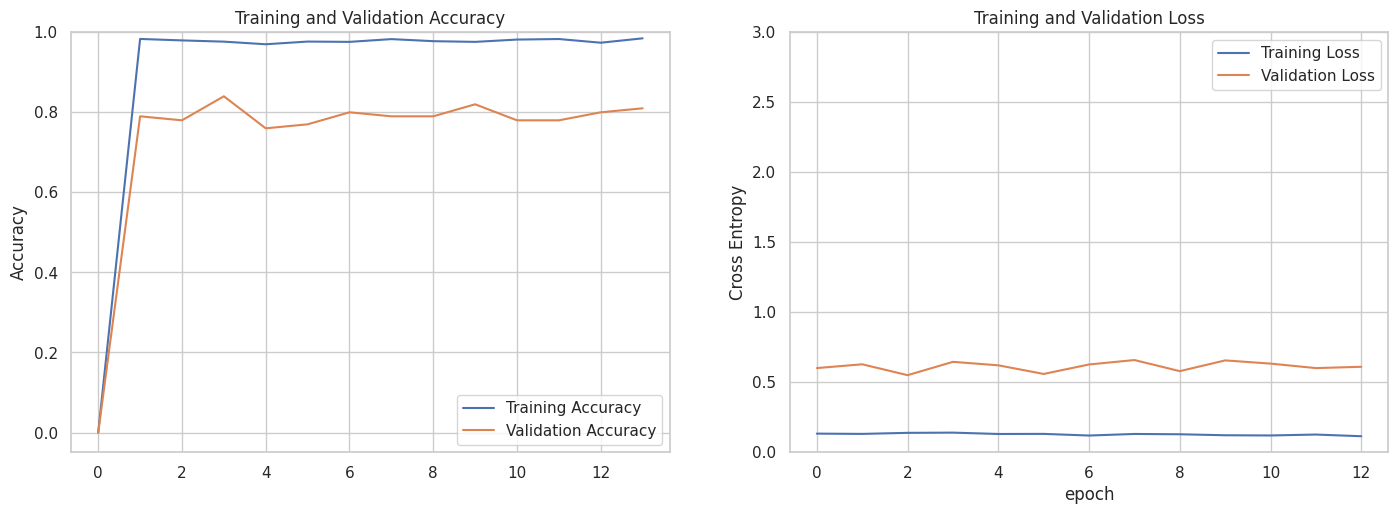

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

###**True and Predicted labels**

In [ ]:
from sklearn.preprocessing import label_binarize

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and make predictions
for images, labels in test_dataset:
    predictions = ensemble_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Binarize the true and predicted labels
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))
predicted_labels_bin = label_binarize(predicted_labels, classes=np.unique(predicted_labels))

4/4 [==============================] - 11s 1s/step


###**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the classification report
print(report)

              precision    recall  f1-score   support

      benign       0.87      0.87      0.87       796
   malignant       0.51      0.50      0.51       204

    accuracy                           0.80      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.80      0.80      0.80      1000



###**ROC Curve for Multiclass Classification**

4/4 [==============================] - 6s 1s/step


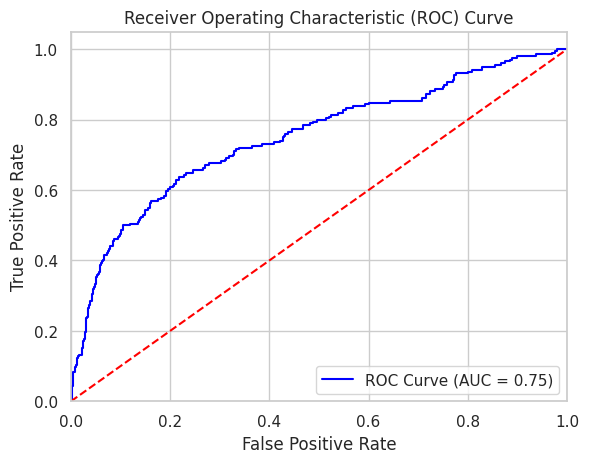

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'model' is your trained model and 'test_dataset' is your test data
predicted_probs = []
true_labels = []
for images, labels in test_dataset:
    predictions = ensemble_model.predict(images)
    predicted_probs.extend(predictions) # Assuming your model outputs probabilities
    true_labels.extend(labels.numpy())

# Ensure predicted_probs are probabilities for the positive class
if len(predicted_probs[0]) > 1:
    predicted_probs = np.array(predicted_probs)[:, 1] # Assuming binary classification

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)

# Calculate AUC
auc = roc_auc_score(true_labels, predicted_probs)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

###**Precision_Recall Curve for Multiclass Classification**

In [ ]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))

for i, color in zip(range(len(class_names)), colors):
    precision, recall, _ = precision_recall_curve(true_labels_bin[:, i], predicted_labels_bin[:, i])
    plt.plot(
        recall, precision,
        label=f'{class_names[i]}',
        color=color,
        linestyle='-',
        linewidth=2,
        alpha=0.8
    )

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Multiclass Fish Diseases Classification (Ensemble Model 1)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


###**Calibration Curve for Multiclass Classification**

IndexError: index 1 is out of bounds for axis 1 with size 1

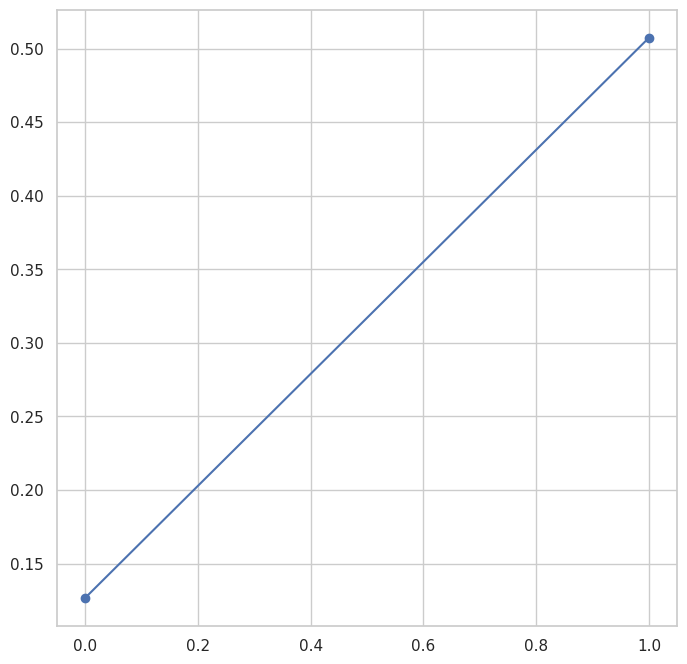

In [ ]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(8, 8))

for i in range(len(class_names)):
    prob_true, prob_pred = calibration_curve(true_labels_bin[:, i], predicted_labels_bin[:, i], n_bins=10, strategy='uniform')
    plt.plot(prob_pred, prob_true, marker='o', label=f'{class_names[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve for Multiclass Classification')
plt.legend(loc='upper left')
plt.show()

### **Confusion Matrix**

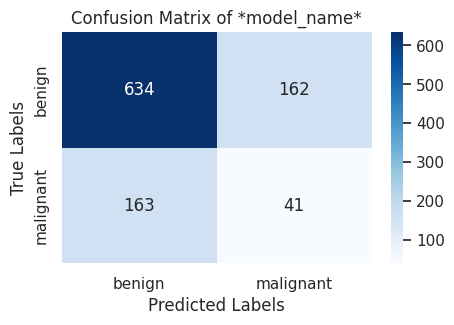

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
## change the model name
plt.title('Confusion Matrix of *model_name*')
plt.show()

###**Cohen's Kappa**

In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(true_labels, predicted_labels)
print(f'Cohen\'s Kappa: {kappa:.4f}')

Cohen's Kappa: -0.0025


###**Matthews Correlation Coefficient (MCC)**

In [ ]:
from sklearn.metrics import matthews_corrcoef
import numpy as np

# Assuming true_labels and predicted_labels are multiclass labels
mcc_values = [matthews_corrcoef(true_labels == i, predicted_labels == i) for i in np.unique(true_labels)]

average_mcc = np.mean(mcc_values)
print(f'Average Matthews Correlation Coefficient for Multiclass: {average_mcc:.4f}')

Average Matthews Correlation Coefficient for Multiclass: -0.0025


In [ ]:
# Calculate total right and wrong predictions
total_right = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
total_wrong = sum(1 for true, pred in zip(true_labels, predicted_labels) if true != pred)
total_samples = len(true_labels)

# Calculate wrong prediction percentage
wrong_prediction_percentage = (total_wrong / total_samples) * 100

print("Total Right Predictions:", total_right)
print("Total Wrong Predictions:", total_wrong)
print("Wrong Prediction Percentage: {:.2f}%".format(wrong_prediction_percentage))


Total Right Predictions: 675
Total Wrong Predictions: 325
Wrong Prediction Percentage: 32.50%


In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
TN, FP, FN, TP = cm.ravel()

# Right and wrong classifications
right_classifications = TP + TN
wrong_classifications = FP + FN

# Calculate percentages
total = right_classifications + wrong_classifications
right_percentage = (right_classifications / total) * 100
wrong_percentage = (wrong_classifications / total) * 100

# Data for the bar plot
labels = ['Right', 'Wrong']
percentages = [right_percentage, wrong_percentage]


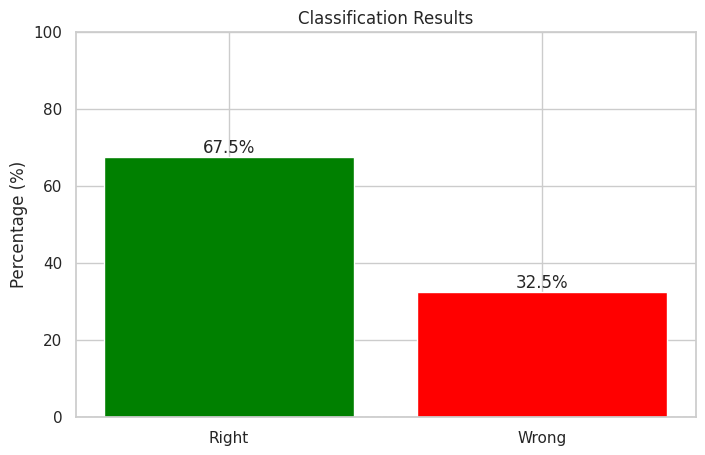

In [ ]:
# Create the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, percentages, color=['green', 'red'])

# Add percentage labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%',
             ha='center', va='bottom')  # va: vertical alignment

# Add titles and labels
plt.title('Classification Results')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')  # Optional: Add a horizontal line at y=0

# Show the plot
plt.show()

4/4 [==============================] - 6s 1s/step


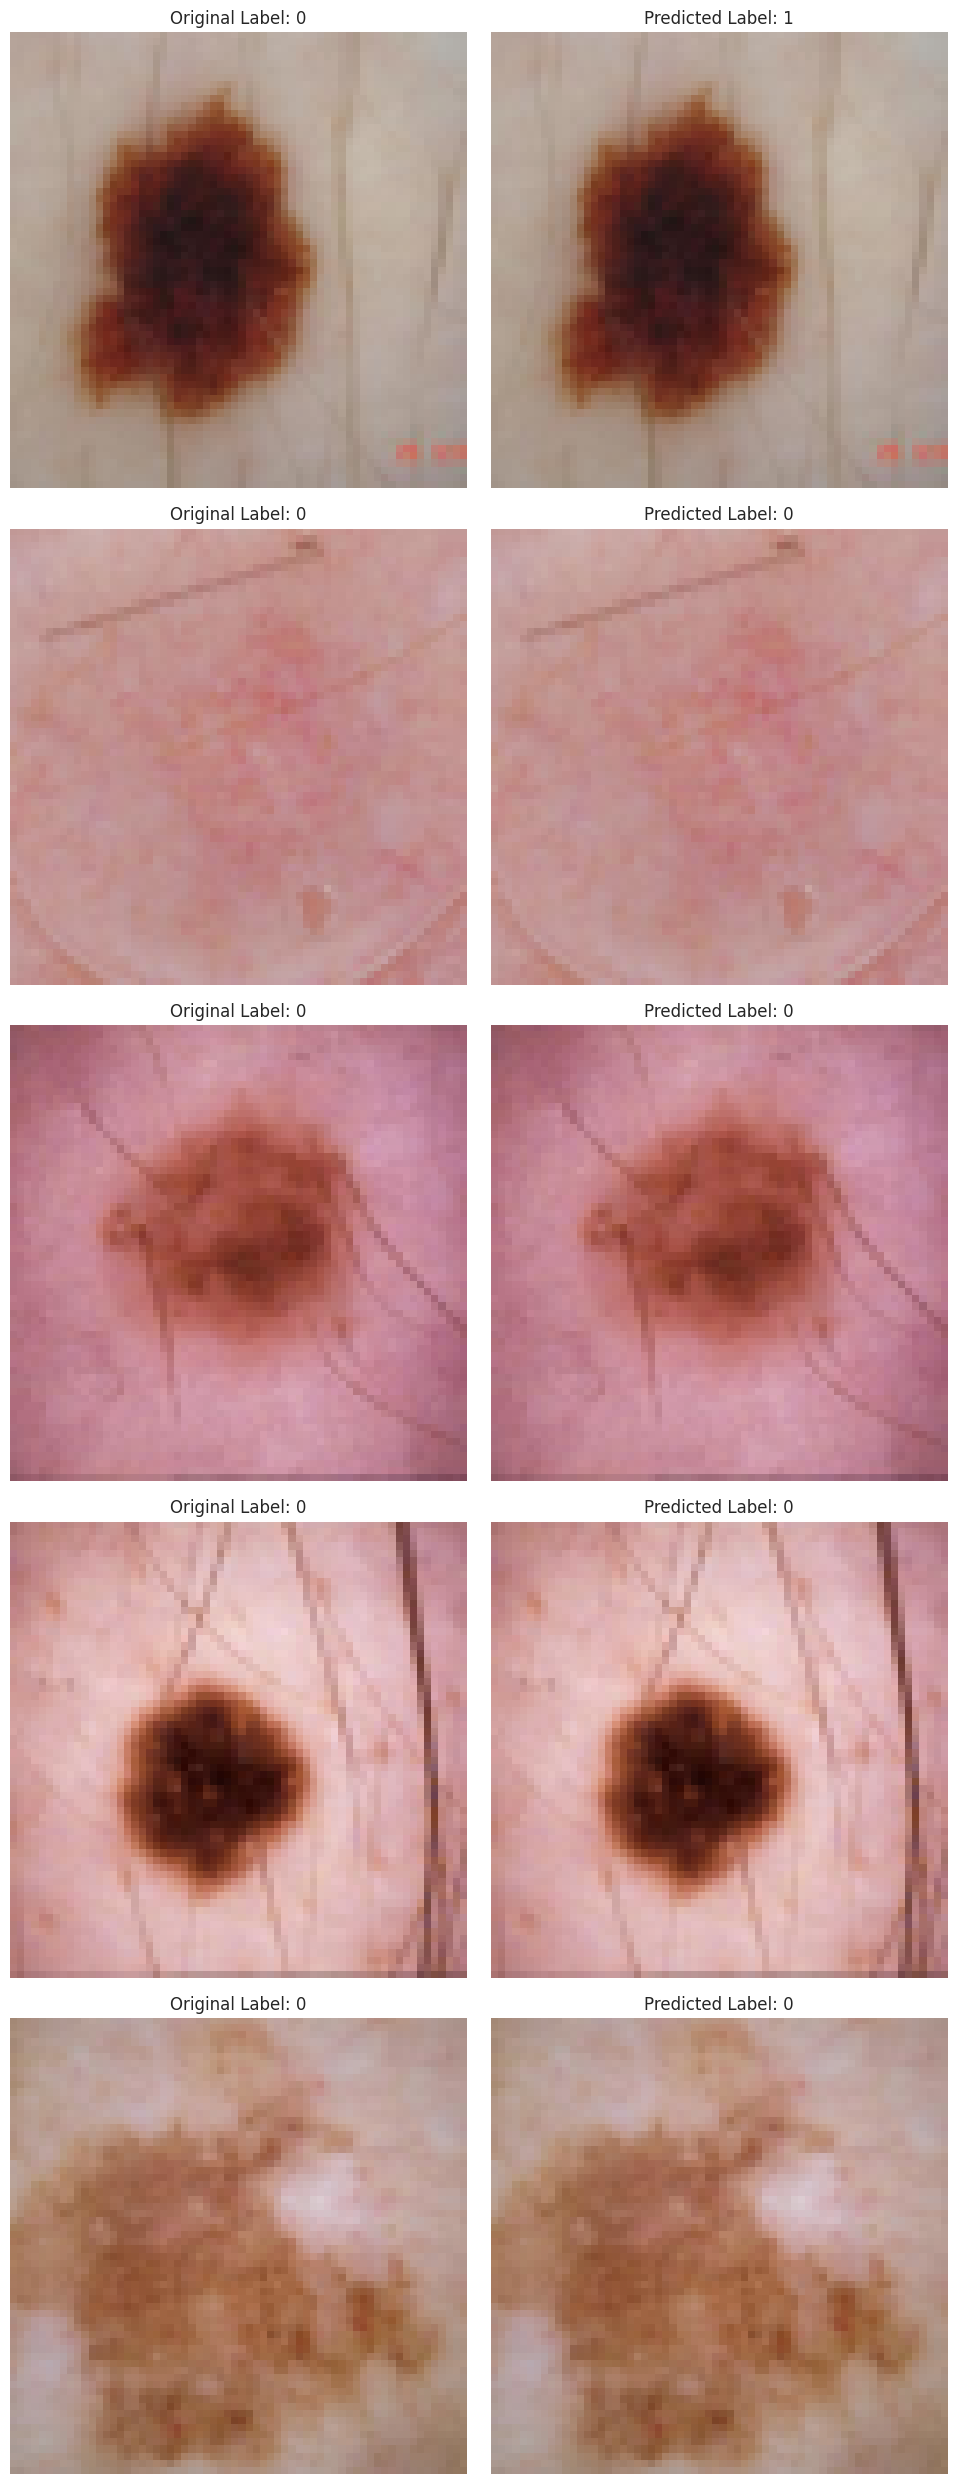

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

# Function to load a specified number of random images from subfolders
def load_random_images_from_subfolders(folder, num_images=5):
    images = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            image_files = os.listdir(subfolder_path)
            # Randomly select images from this subfolder
            selected_files = random.sample(image_files, min(num_images, len(image_files)))
            for image_file in selected_files:
                img_path = os.path.join(subfolder_path, image_file)
                img = Image.open(img_path)
                img = img.resize((64, 64))  # Resize to a consistent size if necessary
                images.append(np.array(img) / 255.0)  # Normalize pixel values
                if len(images) >= num_images:  # Stop if we have enough images
                    break
        if len(images) >= num_images:  # Stop checking subfolders if we have enough images
            break
    return np.array(images)

# Set the path to your test folder
test_folder = '/content/drive/MyDrive/ISIC2018/test'  # Folder containing subfolders of images

# Load exactly 5 random images from subfolders
images = load_random_images_from_subfolders(test_folder, num_images=5)

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and make predictions
for images_batch, labels in test_dataset:  # Replace test_dataset with your actual dataset variable
    predictions = ensemble_model.predict(images_batch)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Convert the lists to NumPy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Ensure that we are only working with the number of images we loaded
num_loaded_images = len(images)
if len(true_labels) > num_loaded_images:
    true_labels = true_labels[:num_loaded_images]
if len(predicted_labels) > num_loaded_images:
    predicted_labels = predicted_labels[:num_loaded_images]

# Set up the plot
cols = 2  # Two columns: original and predicted
rows = num_loaded_images  # One row for each loaded image

fig, axes = plt.subplots(rows, cols, figsize=(10, 5 * rows))

# Loop through and display images
for i in range(num_loaded_images):
    original_image = images[i]
    predicted_label = predicted_labels[i]
    true_label = true_labels[i]

    # Plot original image
    axes[i, 0].imshow(original_image)
    axes[i, 0].set_title(f'Original Label: {true_label}')
    axes[i, 0].axis('off')

    # Plot predicted image (optionally the same image)
    axes[i, 1].imshow(original_image)
    axes[i, 1].set_title(f'Predicted Label: {predicted_label}')
    axes[i, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()

# Calculate sensitivity, specificity, and Jaccard index
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print the results
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity: 0.00
Specificity: 0.80


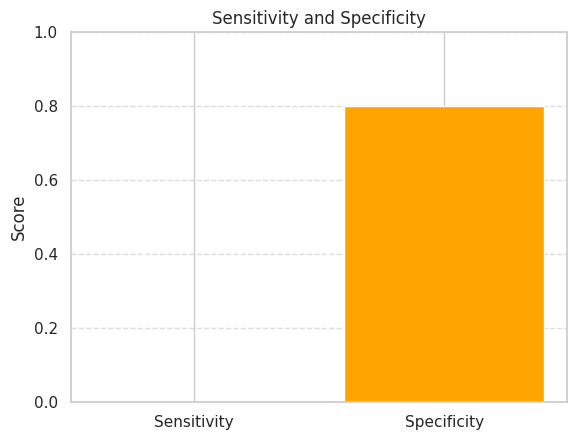

In [ ]:
# Metrics for plotting
metrics = [sensitivity, specificity]
labels = ['Sensitivity', 'Specificity']

# Create bar plot
plt.bar(labels, metrics, color=['blue', 'orange'])
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.ylabel('Score')
plt.title('Sensitivity and Specificity')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()

# Calculate Jaccard Index
jaccard_index = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0

# Calculate Dice Score
dice_score = (2 * tp) / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0

# Print results
print(f"Jaccard Index: {jaccard_index:.2f}")
print(f"Dice Score: {dice_score:.2f}")

Jaccard Index: 0.00
Dice Score: 0.00


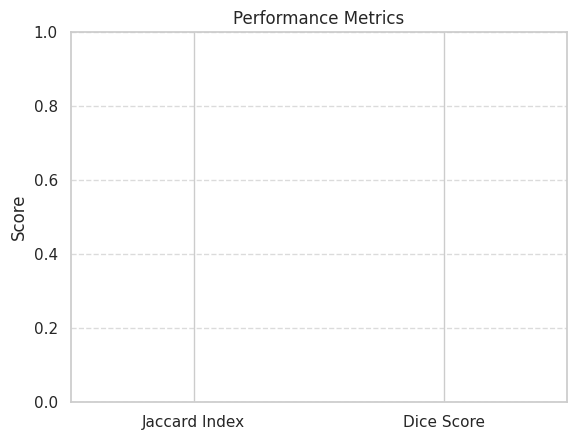

In [ ]:
# Metrics for plotting
metrics = [jaccard_index, dice_score]
labels = ['Jaccard Index', 'Dice Score']

# Create bar plot
plt.bar(labels, metrics, color=['blue', 'orange'])
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()